In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import os

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
#statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#Datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
del df['Id']

In [7]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory Data Analysis

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

## Preprocessing the dataset

<AxesSubplot:>

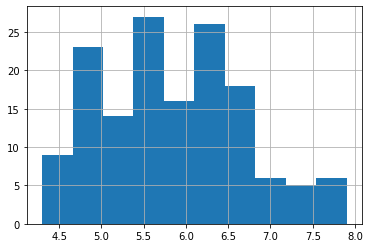

In [10]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

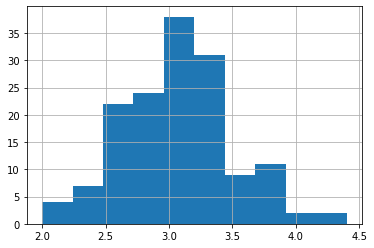

In [11]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

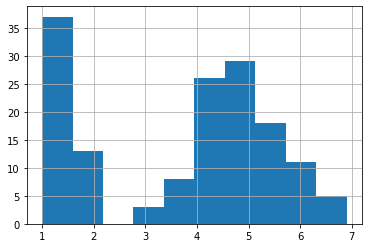

In [12]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

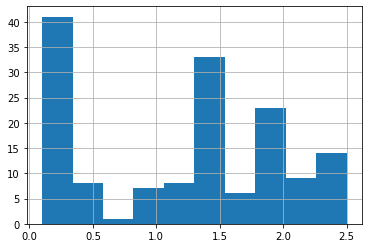

In [13]:
df['PetalWidthCm'].hist()

In [14]:
#Scatter Plot
colors=['Red','Green','Blue']
species=['Iris-versicolor','Iris-virginica','Iris-setosa']

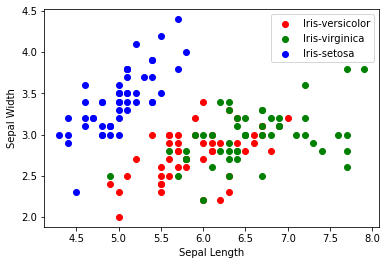

In [15]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

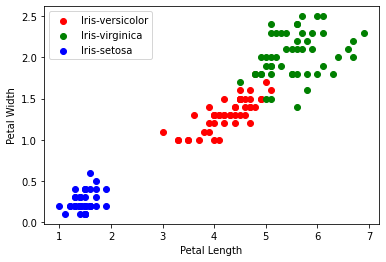

In [16]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

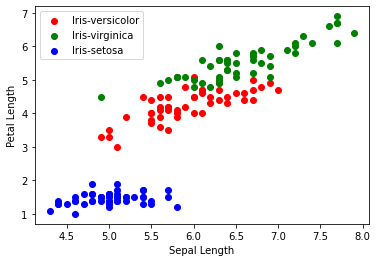

In [17]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

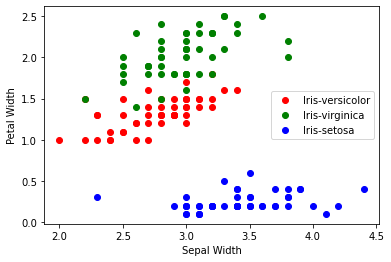

In [18]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## Correlation Matrix

<AxesSubplot:>

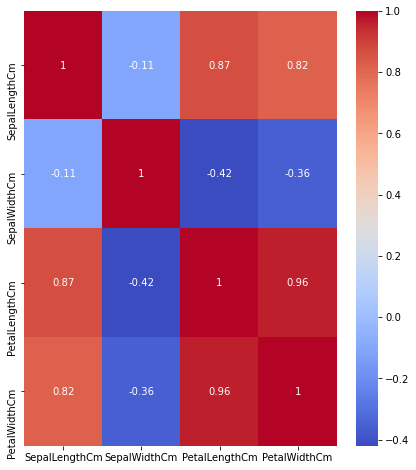

In [22]:
plt.figure(figsize=(7,8))
df_corr=df.corr()
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
#petallength and petalwidth have higher correlation so we better remove one of them

## Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Input Split

In [27]:
X=df.drop(columns=['Species'],axis=1)
Y=df['Species']

## Machine learning Model

In [52]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error


x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

#### Model performance evaluation


In [54]:
cv_score=cross_val_score(model,X,Y,scoring='neg_mean_squared_error',cv=5)
cv_score=np.abs(np.mean(cv_score))

print('Accuracy: ',model.score(x_test,y_test)*100)
print('CV score: ',cv_score)
print('MSE: ',mean_squared_error(y_test,pred))

Accuracy:  100.0
CV score:  0.026666666666666665
MSE:  0.0


## KNN Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)


cv_score=cross_val_score(model,X,Y,scoring='neg_mean_squared_error',cv=5)
cv_score=np.abs(np.mean(cv_score))

print('Accuracy: ',model.score(x_test,y_test)*100)
print('CV score: ',cv_score)
print('MSE: ',mean_squared_error(y_test,pred))

Accuracy:  100.0
CV score:  0.026666666666666665
MSE:  0.0


## DecisionTree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)


cv_score=cross_val_score(model,X,Y,scoring='neg_mean_squared_error',cv=5)
cv_score=np.abs(np.mean(cv_score))

print('Accuracy: ',model.score(x_test,y_test)*100)
print('CV score: ',cv_score)
print('MSE: ',mean_squared_error(y_test,pred))

Accuracy:  100.0
CV score:  0.04
MSE:  0.0
